## TO PREDICT THE BUIDLDING DAMAGES CAUSED DURING EARTHQUAKE.

### DOMAIN ANALYSIS

In [ ]:
1. geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
2. count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
3. age (type: int): age of the building in years.
4. area_percentage (type: int): normalized area of the building footprint.
5. height_percentage (type: int): normalized height of the building footprint.
6. land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
7. foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.

8. roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.
9. ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
10. other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
11. position (type: categorical): position of the building. Possible values: j, o, s, t.
12. plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
13. has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
14. has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
15. has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
16. has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
17. has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
18. has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
19. has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
20. has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.

21. has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
22. has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
23. has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
24. legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
25. count_families (type: int): number of families that live in the building.
26. has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
27. has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
28. has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
29. has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
30. has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
31. has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
32. has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
33. has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
34. has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
35. has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
36. has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.

**Libraries**

In [77]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance

**Import Data**

---



In [78]:
train_data=pd.read_csv('/content/train_labels.csv')
train_values=pd.read_csv('/content/train_values.csv')

**Basic Checks**

In [79]:
print("# Train Values: {}".format(train_data.shape))
print("# Train Labels: {}".format(train_values.shape))

# Train Values: (260601, 2)
# Train Labels: (260601, 39)


In [80]:
train_data.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [81]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [82]:
pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)

In [83]:
df=train = pd.merge(train_values, train_data)
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [84]:
df.shape

(260601, 40)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [86]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [87]:
df.select_dtypes(include = ['int64']).columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade'],
      dt

In [88]:
df.select_dtypes(include=['object']).columns


Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')



**Checking missing values**



In [89]:
# checking the missing percentage

df.isnull().sum()*100/len(df)

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

In [90]:
df.duplicated().sum()*100/len(df)

0.0

There are no missing and duplicate values 

**Outliers**


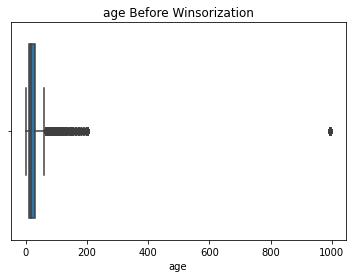

In [91]:
#outliers
feat = "age"
data = df[feat]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(feat))
plt.show()



In [92]:
data.shape

(260601,)

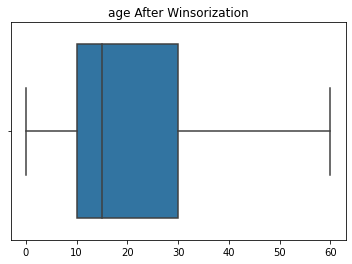

In [93]:
from scipy.stats.mstats import winsorize

#Winsorization
winsorized_data = winsorize(data,(0, 0.05))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(feat))
plt.show()

#Replace data in dataset
df[feat] = winsorized_data

In [94]:
df[feat].shape

(260601,)

In [95]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


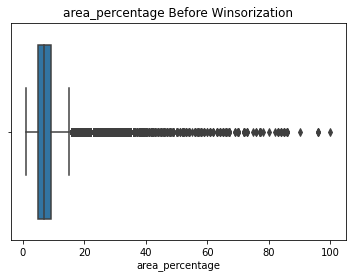

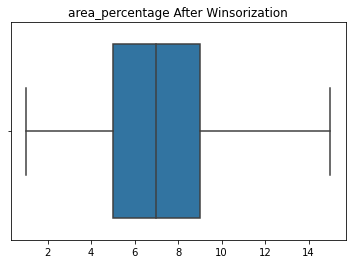

In [96]:
#Data source
feat = "area_percentage"
data = df[feat]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(feat))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.055))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(feat))
plt.show()

#Replace data in dataset
df[feat] = winsorized_data

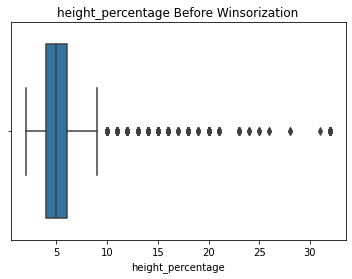

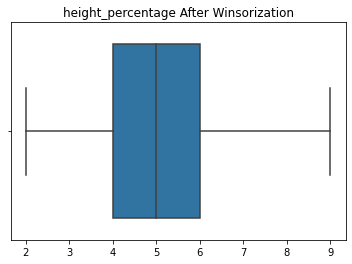

In [97]:
#Data 
feat = "height_percentage"
data = df[feat]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(feat))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.04))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(feat))
plt.show()

#Replace data in dataset
df[feat] = winsorized_data

In [98]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


**Exploratory Data Analysis (EDA)**


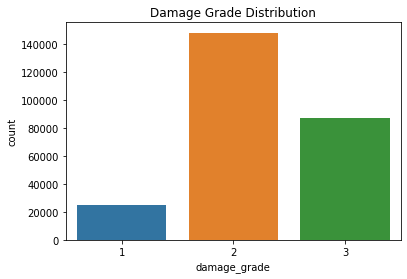

In [99]:
sns.countplot(x="damage_grade", data=df)
plt.title("Damage Grade Distribution")
plt.show()

The dataset is imbalanced

In [100]:
print('no.of buildings in low damage levels : {}'.format(sum(df['damage_grade']=='1')))
print('no.of buildings in low damage levels : {}'.format(sum(df['damage_grade']=='2')))

no.of buildings in low damage levels : 0
no.of buildings in low damage levels : 0


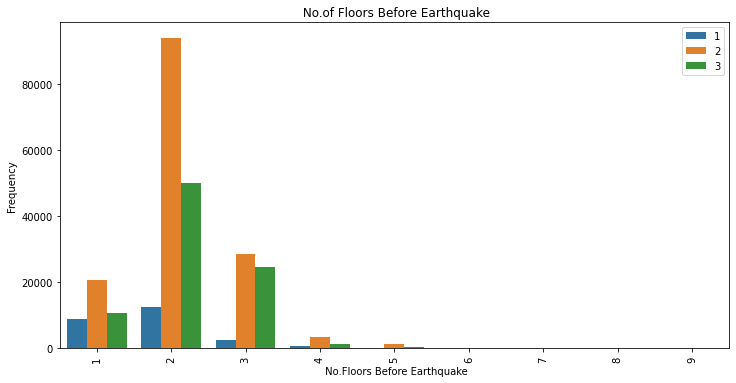

In [101]:
plt.figure(figsize=(12,6))
sns.countplot(df["count_floors_pre_eq"], hue=df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel(" No.Floors Before Earthquake")
plt.xticks(rotation=90)
plt.title(" No.of Floors Before Earthquake")
plt.legend(loc='upper right')
plt.show()

There are maximum 9 floor apartments mostly affected ones are 2 floors.

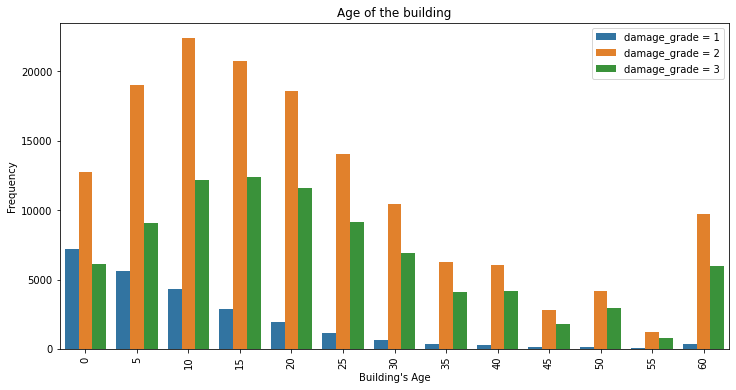

In [102]:
plt.figure(figsize=(12,6))
sns.countplot(x="age",hue="damage_grade",data=df)
plt.ylabel("Frequency")
plt.xlabel("Building's Age")
plt.xticks(rotation=90)
plt.title("Age of the building")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()


The nepal had oldest houses around 995 years old

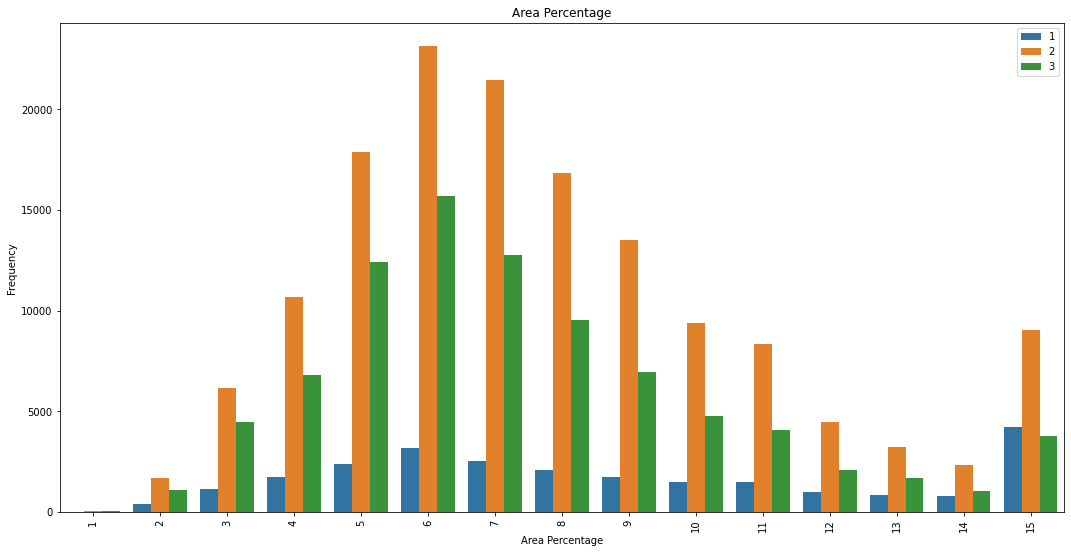

In [103]:
plt.figure(figsize=(18,9))
sns.countplot(x="area_percentage",hue="damage_grade",data=df)
plt.ylabel("Frequency")
plt.xlabel("Area Percentage")
plt.xticks(rotation=90)
plt.title("Area Percentage")
plt.legend(loc='upper right')
plt.show()


The normalized area of the building footprint is less than 20% for most buildings. It is important to mention that some values go up to 100%, 

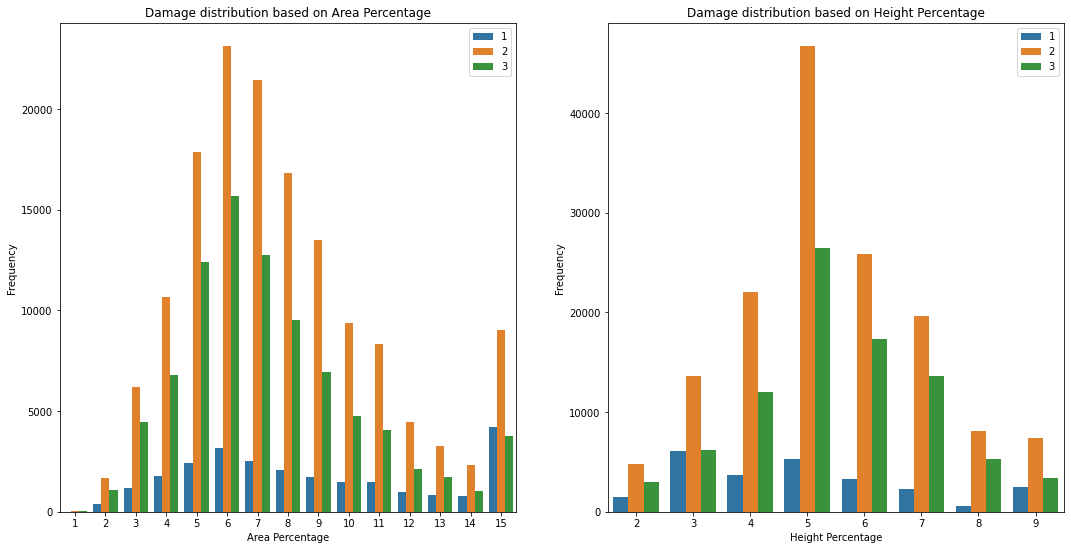

In [104]:
fig = plt.figure(figsize=(18,9))

area_segment = df[df['area_percentage'] <= 25]
height_segment = df[df['height_percentage'] <= 14]

area_height_col = ['area_percentage', 'height_percentage']
area_height_segment = [area_segment, height_segment]
area_height_label = ['Area', 'Height']


for i in range(1,3):
    plt.subplot(int(f'12{i}'))
    sns.countplot(area_height_segment[i-1][area_height_col[i-1]], hue=area_height_segment[i-1]['damage_grade'])
    plt.xlabel(f'{area_height_label[i-1]} Percentage', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.title(f'Damage distribution based on {area_height_label[i-1]} Percentage')
    plt.legend(loc='upper right')
plt.show()

It can be seen that many buildings in Nepal have an area or area percentage of 1 to 20 and the majority suffered moderate levels of damage due to the earthquake. The building height itself is in the range of 2 to 10 and experienced a moderate level of damage due to the earthquake.

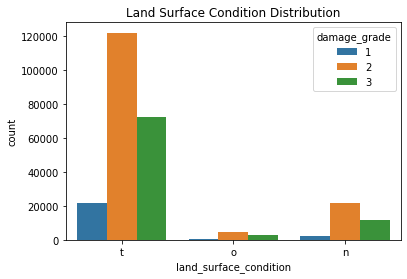

In [105]:
sns.countplot(x = "land_surface_condition", hue ="damage_grade",data=df)
plt.title("Land Surface Condition Distribution")
plt.show()

it indicates the surface condition of the land and possible values n,o,t

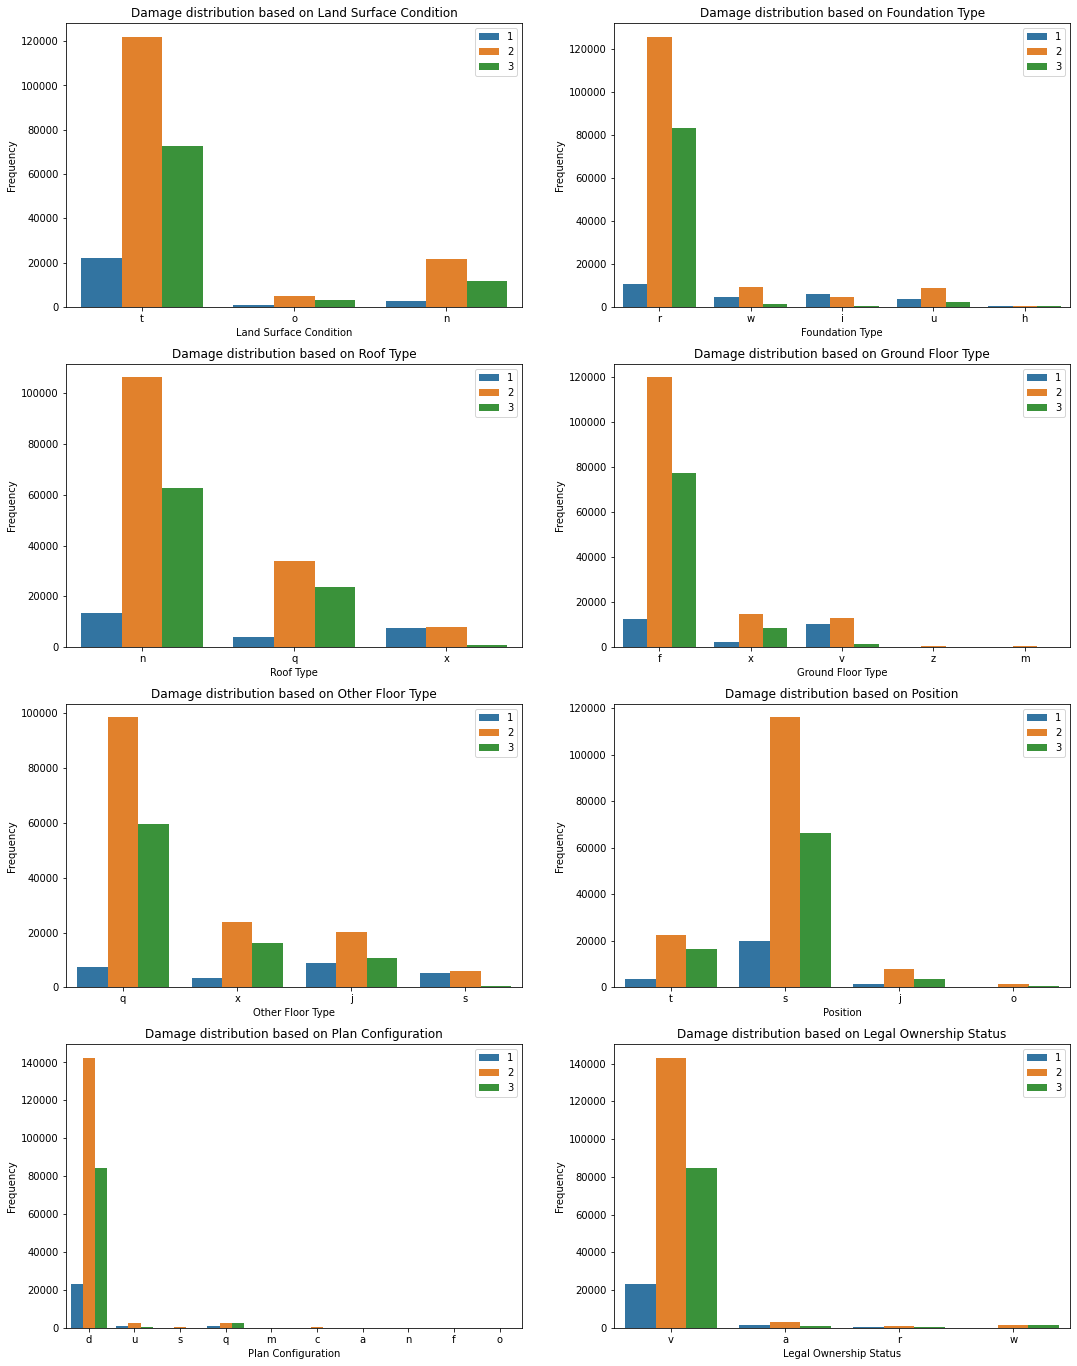

In [30]:
fig = plt.figure(figsize=(18,24))

cat_col = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type',
                   'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
cat_col_label = ['Land Surface Condition', 'Foundation Type', 'Roof Type', 'Ground Floor Type',
                 'Other Floor Type', 'Position', 'Plan Configuration', 'Legal Ownership Status']

for i in range(1,9):
    plt.subplot(int(f'42{i}'))
    sns.countplot(df[cat_col[i-1]], hue=df['damage_grade'])
    plt.xlabel(f'{cat_col_label[i-1]}', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.title(f'Damage distribution based on {cat_col_label[i-1]}')
    plt.legend(loc='upper right')
plt.show()

Based on the picture above, buildings in Nepal have a building ground surface condition of t and this ground surface has an influence on the level of damage that occurs to buildings. Buildings with the type of foundation r have the highest number and have an influence on the level of damage that occurs in buildings. Buildings with type n roofs have the highest number and have an influence on the level of damage that occurs to buildings. Buildings with the type of floor used on the ground floor of a type f building have the highest number and have an influence on the level of damage that occurs to the building. Buildings with floor types used on other floors mostly use q-type floors and the majority of them experience medium and high levels of damage. Most of the buildings in Nepal used the s-type position and the majority suffered moderate levels of damage due to the earthquake. The plan configuration of buildings in Nepal is dominated by d and many of them experienced moderate levels of damage. The ownership status of the buildings was dominated by v and many of them experienced moderate levels of damage.

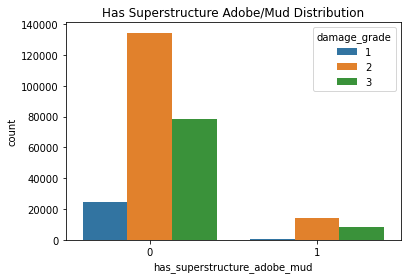

In [31]:
sns.countplot(x = df["has_superstructure_adobe_mud"], hue =df["damage_grade"])
plt.title("Has Superstructure Adobe/Mud Distribution")
plt.show()

This is a flag variable that indicates if the superstructure was made of Adobe/Mud

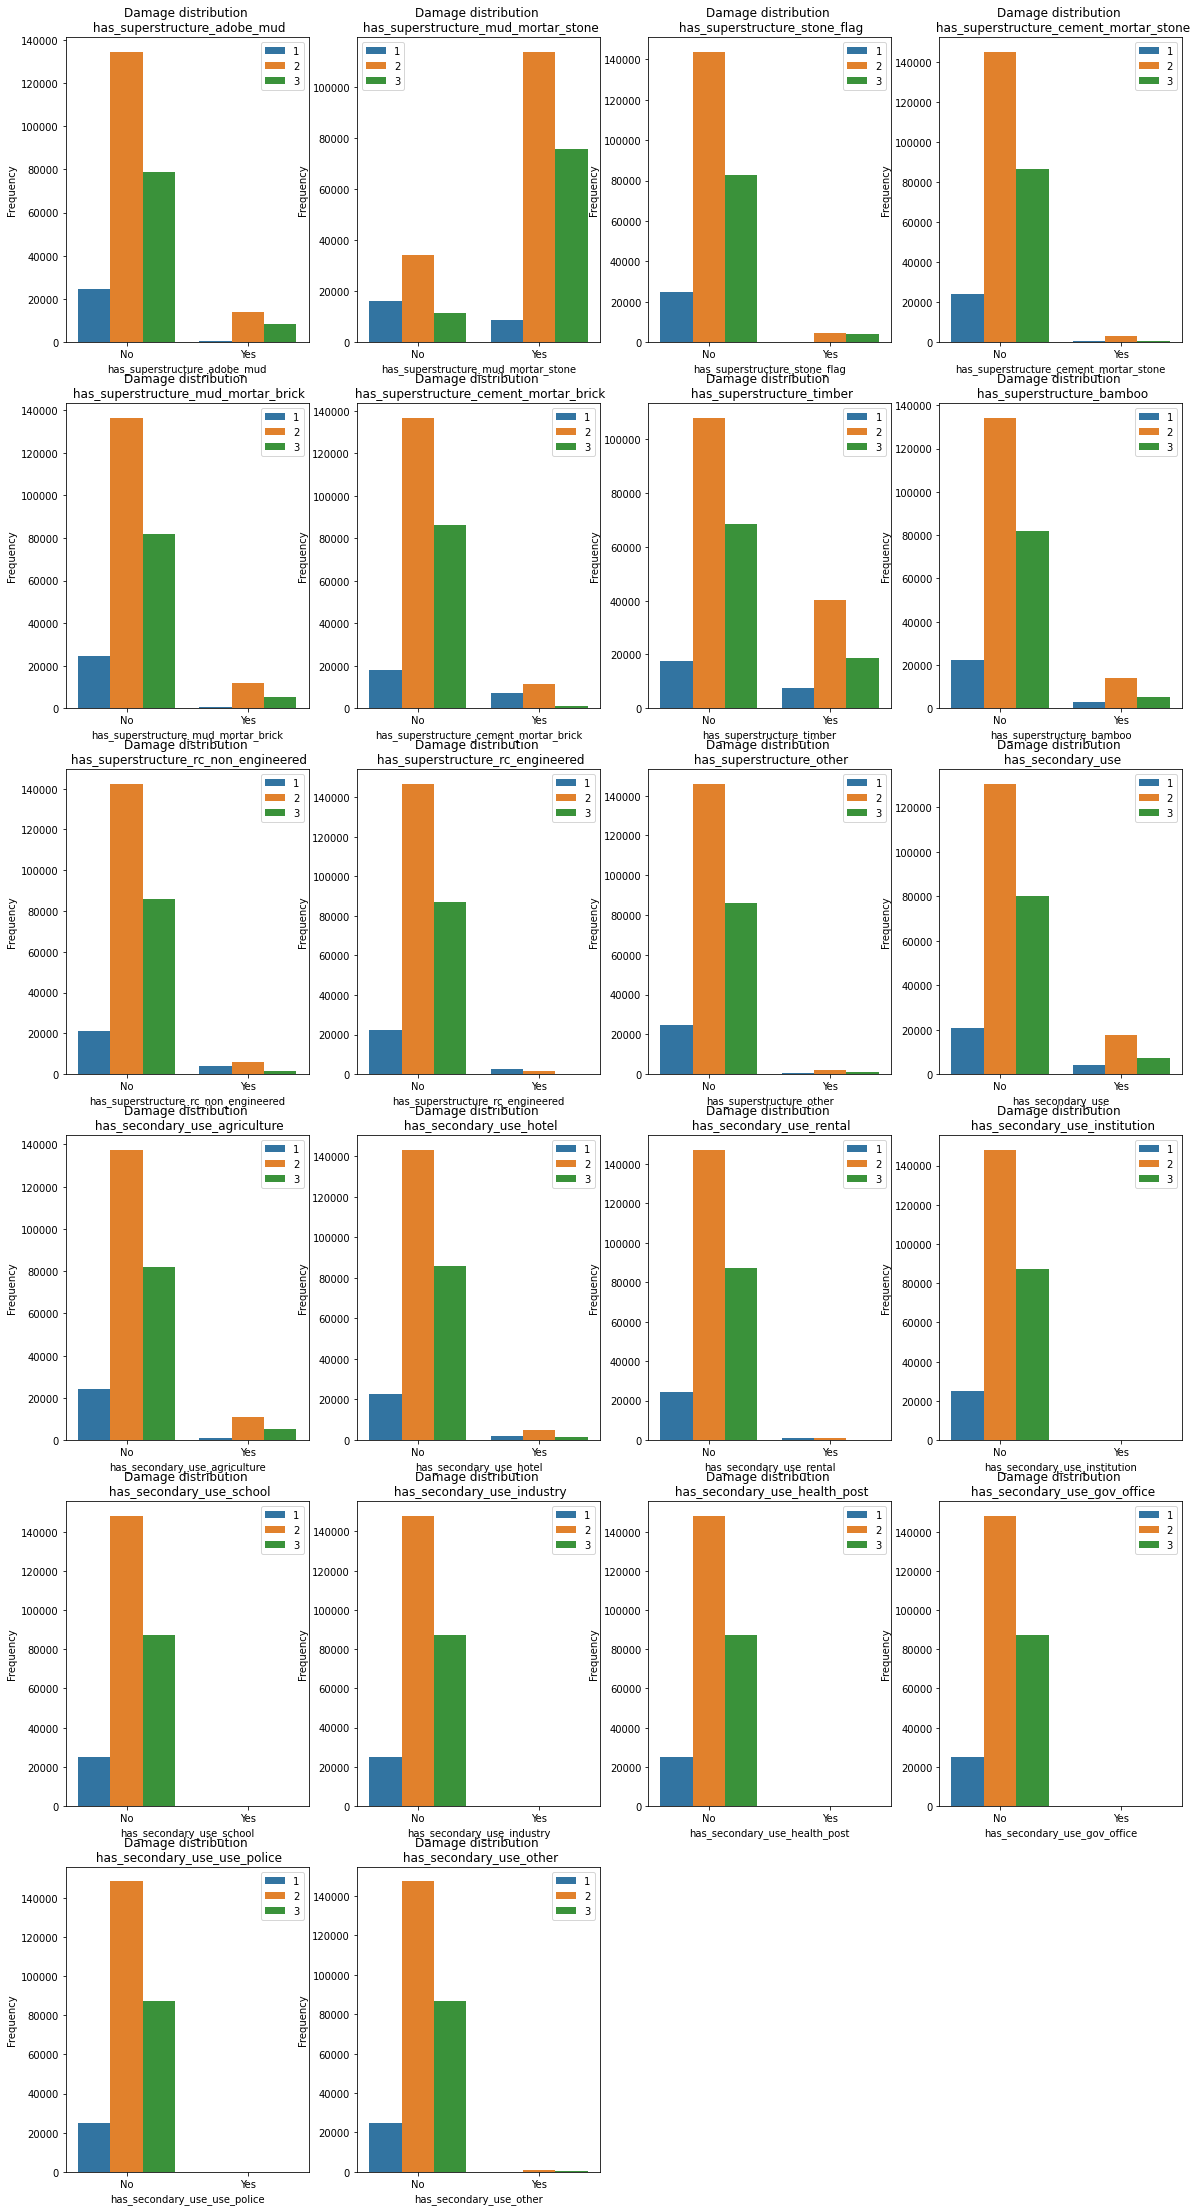

In [32]:
fig = plt.figure(figsize=(20,46))

binary_col = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 
              'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 
              'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
              'has_superstructure_timber', 'has_superstructure_bamboo',
              'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered',
              'has_superstructure_other', 'has_secondary_use', 
              'has_secondary_use_agriculture', 'has_secondary_use_hotel',
              'has_secondary_use_rental', 'has_secondary_use_institution',
              'has_secondary_use_school', 'has_secondary_use_industry', 
              'has_secondary_use_health_post', 'has_secondary_use_gov_office',
              'has_secondary_use_use_police', 'has_secondary_use_other']

for i in range(1,23):
    plt.subplot(7,4,int(f'{i}'))
    p = sns.countplot(train[binary_col[i-1]], hue=train['damage_grade'])
    p.set_xticklabels(['No', 'Yes'])
    plt.xlabel(f'{binary_col[i-1]}', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.title(f'Damage distribution \n {binary_col[i-1]}')
    plt.legend(loc='best')
plt.show()

In buildings in Nepal, the superstructure that is widely used in buildings is a superstructure of a mixture of Mud Mortar Stone or a superstructure made of Timber. Most of the buildings using the superstructure experienced moderate levels of damage followed by high levels of damage. Apart from buildings for private purposes, many buildings in Nepal are used for agriculture, hotels, rentals, institutions, schools, health posts, government offices, police stations and other purposes. Buildings that have a secondary purpose as agricultural facilities and hotels are the two sectors with the highest number of buildings compared to buildings with other secondary purposes. Most buildings with a secondary purpose for agriculture and hotels suffered moderate levels of damage.

**Correlation Matrix**

In [33]:
features = df.copy()

corr_matrix = features.corr()

In [34]:
features.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [35]:
corr_matrix

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,1.000000,-0.002850,0.000347,-0.000393,-0.000654,0.000084,-0.002801,0.000535,-0.000307,0.002423,0.001443,-0.000827,-0.003768,0.001933,0.001967,0.001266,0.002472,-0.002259,0.002171,-0.000599,0.002606,0.002631,0.001934,-0.002152,0.000706,-0.000362,0.002348,-0.000374,0.000538,-0.003116,-0.002295,0.001063
geo_level_1_id,-0.002850,1.000000,-0.061405,0.002718,-0.089364,-0.052075,0.061088,-0.072263,-0.018245,-0.152038,0.007677,0.023656,-0.028854,0.134121,0.144985,0.074169,0.016454,0.015767,0.022670,0.035108,-0.010428,-0.019786,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992,-0.072347
geo_level_2_id,0.000347,-0.061405,1.000000,0.000921,0.047730,0.032917,-0.033234,0.038576,0.015833,0.076491,-0.008743,-0.009122,0.014246,-0.079875,-0.023927,-0.032588,-0.038173,-0.036074,-0.020144,-0.012439,-0.001519,0.017522,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068,0.043161
geo_level_3_id,-0.000393,0.002718,0.000921,1.000000,-0.021646,-0.005122,-0.002703,-0.020083,-0.015732,0.026294,0.019579,0.005966,-0.023278,-0.005116,-0.003916,0.006143,0.002265,-0.012420,-0.010604,-0.002479,0.007375,0.015995,-0.002001,-0.007356,-0.007058,-0.004373,-0.000862,-0.002632,-0.000943,0.000269,-0.002463,0.007932
count_floors_pre_eq,-0.000654,-0.089364,0.047730,-0.021646,1.000000,0.279047,0.112187,0.771407,0.174852,-0.027116,-0.041058,-0.011329,0.257279,-0.085821,-0.056637,-0.070487,0.007448,0.049000,-0.029888,0.086586,0.052125,-0.005294,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073,0.122308
age,0.000084,-0.052075,0.032917,-0.005122,0.279047,1.000000,-0.024180,0.208124,0.200320,0.057114,0.011131,-0.043980,0.237310,-0.143270,-0.035851,-0.050141,-0.091407,-0.103459,-0.007569,0.042366,-0.034983,0.008705,-0.052718,-0.025480,-0.015003,-0.008807,-0.007536,-0.005130,-0.004163,-0.002912,-0.005133,0.163126
area_percentage,-0.002801,0.061088,-0.033234,-0.002703,0.112187,-0.024180,1.000000,0.208996,0.036227,-0.209937,0.002867,0.079899,0.056518,0.203602,-0.049089,-0.029780,0.179968,0.195107,0.008561,0.092568,0.109864,-0.013103,0.141663,0.098249,0.038883,0.031263,0.018958,0.013424,0.011046,0.005842,0.012970,-0.120706
height_percentage,0.000535,-0.072263,0.038576,-0.020083,0.771407,0.208124,0.208996,1.000000,0.161975,-0.067415,-0.019615,0.008420,0.205477,-0.030886,-0.045182,-0.063668,0.058128,0.089586,-0.019368,0.073123,0.065732,-0.007122,0.090311,0.055299,0.023208,0.012428,-0.000075,0.008653,0.011931,0.004354,0.002913,0.071615
has_superstructure_adobe_mud,-0.000307,-0.018245,0.015833,-0.015732,0.174852,0.200320,0.036227,0.161975,1.000000,-0.306861,0.006962,-0.014554,0.314979,-0.037549,0.011694,0.011528,-0.036830,-0.036782,0.057545,0.033068,-0.013300,-0.003917,-0.012642,-0.003935,-0.004281,-0.002369,0.001762,-0.003292,-0.002648,-0.001493,-0.010074,0.055314
has_superstructure_mud_mortar_stone,0.002423,-0.152038,0.076491,0.026294,-0.027116,0.057114,-0.209937,-0.067415,-0.306861,1.000000,-0.034046,-0.104288,-0.376208,-0.470715,-0.040177,-0.054657,-0.222366,-0.224509,-0.041705,0.001576,-0.087520,0.058261,-0.159532,-0.117948,-0.036064,-0.023070,-0.025507,-0.008763,-0.011904,-0.003380,0.005628

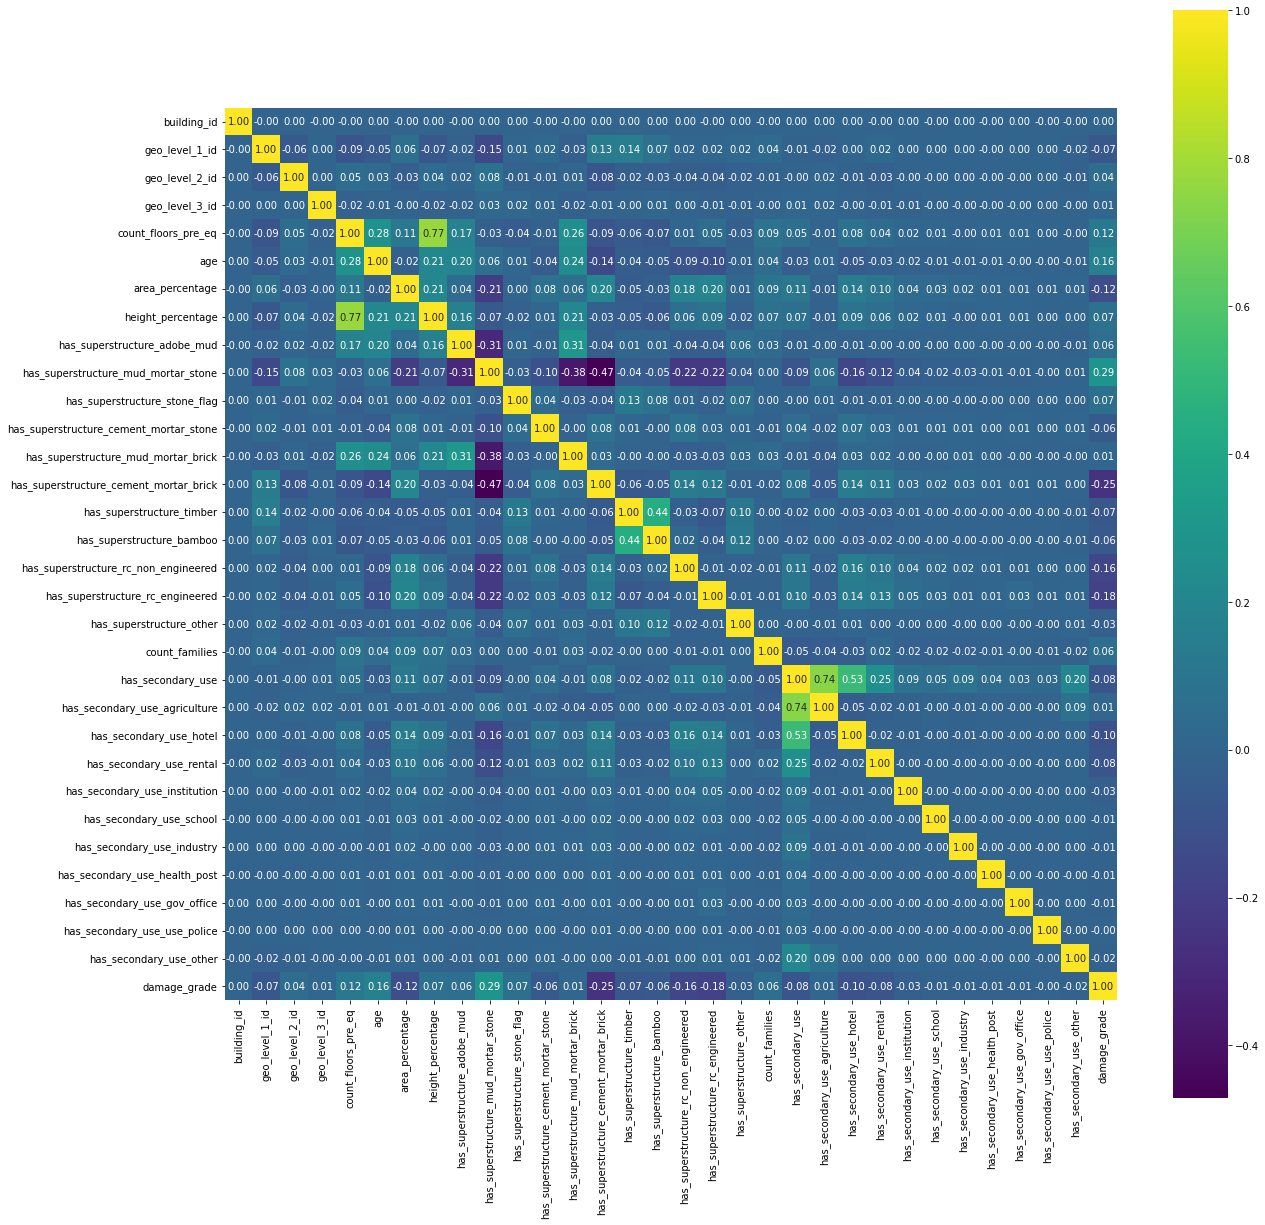

In [36]:
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

In [37]:



list_corr = corr_matrix['damage_grade'].drop('damage_grade')
list_corr

building_id                               0.001063
geo_level_1_id                           -0.072347
geo_level_2_id                            0.043161
geo_level_3_id                            0.007932
count_floors_pre_eq                       0.122308
age                                       0.163126
area_percentage                          -0.120706
height_percentage                         0.071615
has_superstructure_adobe_mud              0.055314
has_superstructure_mud_mortar_stone       0.291325
has_superstructure_stone_flag             0.066039
has_superstructure_cement_mortar_stone   -0.060295
has_superstructure_mud_mortar_brick       0.014561
has_superstructure_cement_mortar_brick   -0.254131
has_superstructure_timber                -0.069852
has_superstructure_bamboo                -0.063051
has_superstructure_rc_non_engineered     -0.158145
has_superstructure_rc_engineered         -0.179014
has_superstructure_other                 -0.030224
count_families                 

In [38]:

list_corr.loc[[
              'has_superstructure_adobe_mud', 
              'has_superstructure_mud_mortar_stone',
              'has_superstructure_stone_flag',
              'has_superstructure_cement_mortar_stone',
              'has_superstructure_mud_mortar_brick',
              'has_superstructure_cement_mortar_brick', 
              'has_superstructure_timber',
              'has_superstructure_bamboo', 
              'has_superstructure_rc_non_engineered',
              'has_superstructure_rc_engineered', 
              'has_superstructure_other'
              ]]


has_superstructure_adobe_mud              0.055314
has_superstructure_mud_mortar_stone       0.291325
has_superstructure_stone_flag             0.066039
has_superstructure_cement_mortar_stone   -0.060295
has_superstructure_mud_mortar_brick       0.014561
has_superstructure_cement_mortar_brick   -0.254131
has_superstructure_timber                -0.069852
has_superstructure_bamboo                -0.063051
has_superstructure_rc_non_engineered     -0.158145
has_superstructure_rc_engineered         -0.179014
has_superstructure_other                 -0.030224
Name: damage_grade, dtype: float64

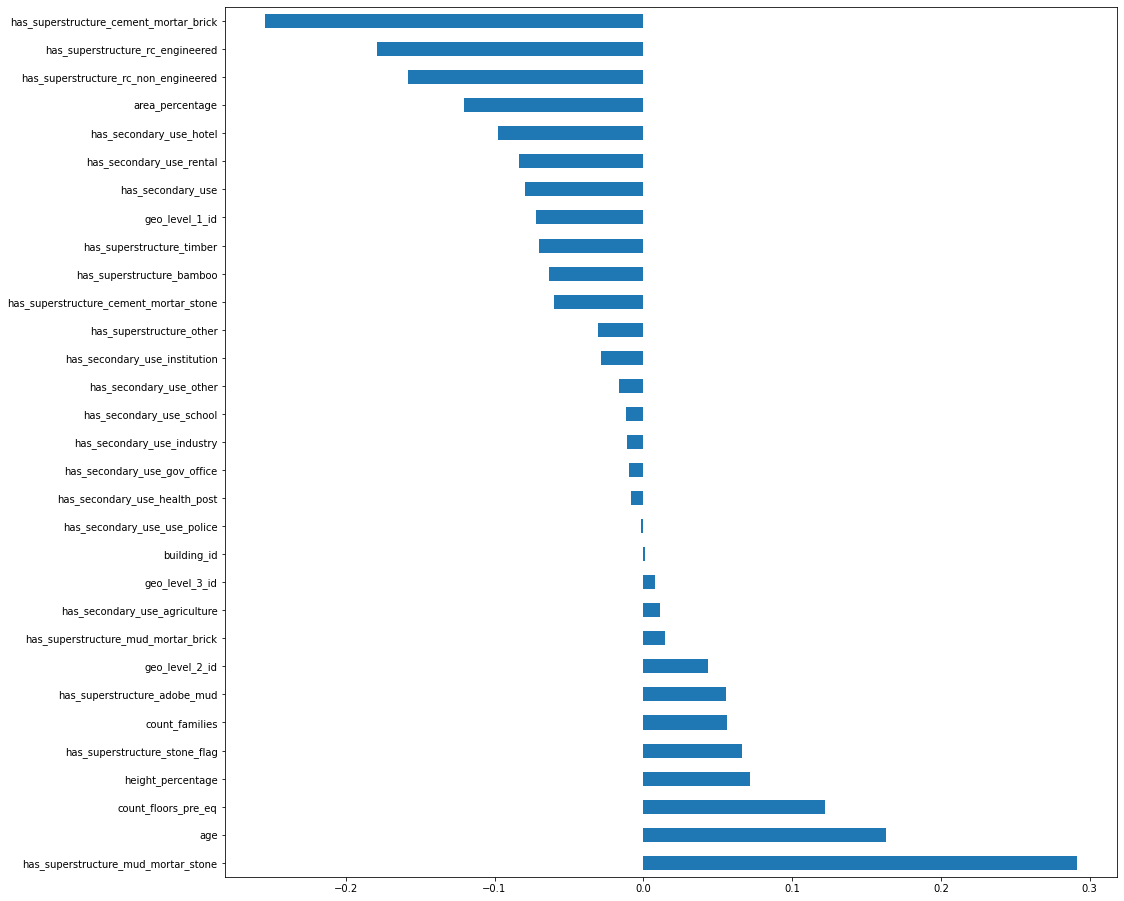

In [39]:
plt.figure(figsize=(16,16))

corr_matrix['damage_grade'].drop('damage_grade').sort_values(ascending=False).plot(kind='barh')
plt.show()

Based on the features on the level of damage to buildings, we will choose 4 material features that have the highest correlation level with damage_grade. The 4 features are has_superstructure_mud_mortar_stone, has_superstructure_cement_mortar_brick, has_superstructure_rc_engineered, and has_superstructure_rc_non_engineered. Several insights were obtained based on data from the previous EDA process, namely.

Buildings that do not have Reinforce Concrete Engineered superstructures experience medium and high levels of damage when viewed from the distribution of the number of floors, building height, and building area.
The number of buildings using Reinforce Concrete Non Engineered superstructures experienced moderate levels of damage more than the number of buildings using Reinforce Concrete Engineered superstructures when viewed from the distribution of the number of floors, building height, and building area.
Buildings that use Cement Mortar Brick superstructures experience a lower level of damage than those that do not.
Therefore we can provide recommendations for the characteristics of buildings (houses) with the following characteristics.

Using the Reinforce Concrete Engineered superstructure
Using the Cement Mortar Brick superstructure
More about this source textSource text required for additional translation information
Send feedback
Side panels

In [40]:

list_corr.loc[['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']]

count_floors_pre_eq    0.122308
age                    0.163126
area_percentage       -0.120706
height_percentage      0.071615
Name: damage_grade, dtype: float64

**Feature Selection using select Kbest andchi2** 

In [41]:

data = features.copy()
data = data.set_index('building_id')
data_num = data.select_dtypes(include=['int64', 'float64'])
data_cat = data.select_dtypes(include=['object'])

In [42]:
data

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [43]:
print('Correlation feature height_percentage with damage_grade : {:.4f}'.format(corr_matrix.loc['height_percentage', 'damage_grade']))
print('Correlation feature has_secondary_use_agriculture with damage_grade : {:.4f}'.format(corr_matrix.loc['has_secondary_use_agriculture', 'damage_grade']))



Correlation feature height_percentage with damage_grade : 0.0716
Correlation feature has_secondary_use_agriculture with damage_grade : 0.0113


In [44]:

data_num = data_num.drop('has_secondary_use_agriculture', axis=1)
data_num.shape

(260601, 30)

Based on the correlation values ​​above, it can be seen that the *height_percentage* feature has a higher correlation level, so we will remove the *has_secondary_use_agriculture* feature.

In [45]:

data_cat = pd.get_dummies(data_cat)
data_cat.head()


,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
28830,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
94947,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
590882,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
201944,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [46]:
data_cat.shape

(260601, 38)

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
category_rank_feature = SelectKBest(score_func=chi2, k=38)
rank_feature = category_rank_feature.fit(data_cat, data_num['damage_grade'])
rank_feature.scores_

array([3.14202700e+02, 6.77046429e+01, 6.77640172e+01, 4.15860728e+02,
       2.79293047e+04, 6.39195232e+03, 5.49424844e+03, 8.31579458e+03,
       1.04584801e+03, 1.15697625e+03, 2.80485950e+04, 3.68489235e+03,
       9.75543604e+01, 3.24654211e+04, 6.05516649e+01, 1.22429528e+02,
       7.42291993e+03, 5.10846128e+03, 1.85494082e+04, 4.06602490e+02,
       2.59354872e+02, 1.48779877e+02, 4.93714399e+01, 6.22421247e+02,
       1.09200110e+02, 1.50572497e+02, 3.04753264e+01, 3.34305427e+00,
       1.36435198e+01, 1.65187836e+00, 5.72019260e+01, 3.23110604e+02,
       3.31565900e+01, 1.01176162e+03, 2.26362245e+03, 5.34417037e+01,
       3.96056239e+01, 2.29493063e+02])

In [48]:

cat_score = pd.DataFrame(rank_feature.scores_, columns=['Score'])
cat_col = pd.DataFrame(data_cat.columns, columns=['Feature'])
univariate_cat_rank = pd.concat([cat_col, cat_score], axis=1)
univariate_cat_rank.set_index('Feature', inplace=True)
sorted_univariate_cat_rank = univariate_cat_rank.sort_values('Score', ascending=False)

In [49]:
sorted_univariate_cat_rank

,Score
Feature,
ground_floor_type_v,32465.421066
roof_type_x,28048.595012
foundation_type_i,27929.304672
other_floor_type_s,18549.408221
foundation_type_w,8315.794578
other_floor_type_j,7422.919931
foundation_type_r,6391.952318
foundation_type_u,5494.248443
other_floor_type_q,5108.461280


In [50]:
chi2_greater100 = sorted_univariate_cat_rank[sorted_univariate_cat_rank['Score']>100]
chi2_greater100 

,Score
Feature,
ground_floor_type_v,32465.421066
roof_type_x,28048.595012
foundation_type_i,27929.304672
other_floor_type_s,18549.408221
foundation_type_w,8315.794578
other_floor_type_j,7422.919931
foundation_type_r,6391.952318
foundation_type_u,5494.248443
other_floor_type_q,5108.461280


The process of selecting features with a categorical type will use SelectKBest. Using this, the chi squared metrics is used where the higher the chi squared, the more significant the effect of the feature.

In [51]:


data_new = pd.concat([data_num, data_cat], axis=1)

In [52]:


data_new.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [53]:
data_new.shape

(260601, 68)

**feature selection. random forest**

In [54]:

# Select the numeric columns
numeric_subset = df.select_dtypes('number')


# Select the categorical columns
categorical_subset = train[['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
train_dummy = pd.concat([numeric_subset, categorical_subset], axis = 1)
print(train_dummy.shape)



(260601, 70)


In [55]:
data_new.head(1)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [56]:

y = train_dummy['damage_grade']
x = train_dummy.drop(['building_id','damage_grade'], axis =1)
print('x',x.shape)
print('y',y.shape)
# x, y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)


print('y_train: ', y_train.shape)
print('X_train: ',X_train.shape)
print('y_test: ', y_test.shape)
print('X_test: ', X_test.shape)


x (260601, 68)
y (260601,)
y_train:  (208480,)
X_train:  (208480, 68)
y_test:  (52121,)
X_test:  (52121, 68)


In [57]:
# feature importance
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(feature_imp[:20])
a = feature_imp.to_frame()
print()
a.index[:20]


geo_level_3_id                            0.156596
geo_level_2_id                            0.136832
geo_level_1_id                            0.135158
age                                       0.118488
area_percentage                           0.109445
height_percentage                         0.052952
count_families                            0.025062
count_floors_pre_eq                       0.016761
has_superstructure_mud_mortar_stone       0.013971
foundation_type_r                         0.013423
has_superstructure_timber                 0.011435
land_surface_condition_t                  0.009303
ground_floor_type_v                       0.008956
ground_floor_type_f                       0.008513
land_surface_condition_n                  0.008445
position_s                                0.008265
has_superstructure_adobe_mud              0.007956
has_superstructure_cement_mortar_brick    0.007794
position_t                                0.007484
has_secondary_use              

Index(['geo_level_3_id', 'geo_level_2_id', 'geo_level_1_id', 'age',
       'area_percentage', 'height_percentage', 'count_families',
       'count_floors_pre_eq', 'has_superstructure_mud_mortar_stone',
       'foundation_type_r', 'has_superstructure_timber',
       'land_surface_condition_t', 'ground_floor_type_v',
       'ground_floor_type_f', 'land_surface_condition_n', 'position_s',
       'has_superstructure_adobe_mud',
       'has_superstructure_cement_mortar_brick', 'position_t',
       'has_secondary_use'],
      dtype='object')

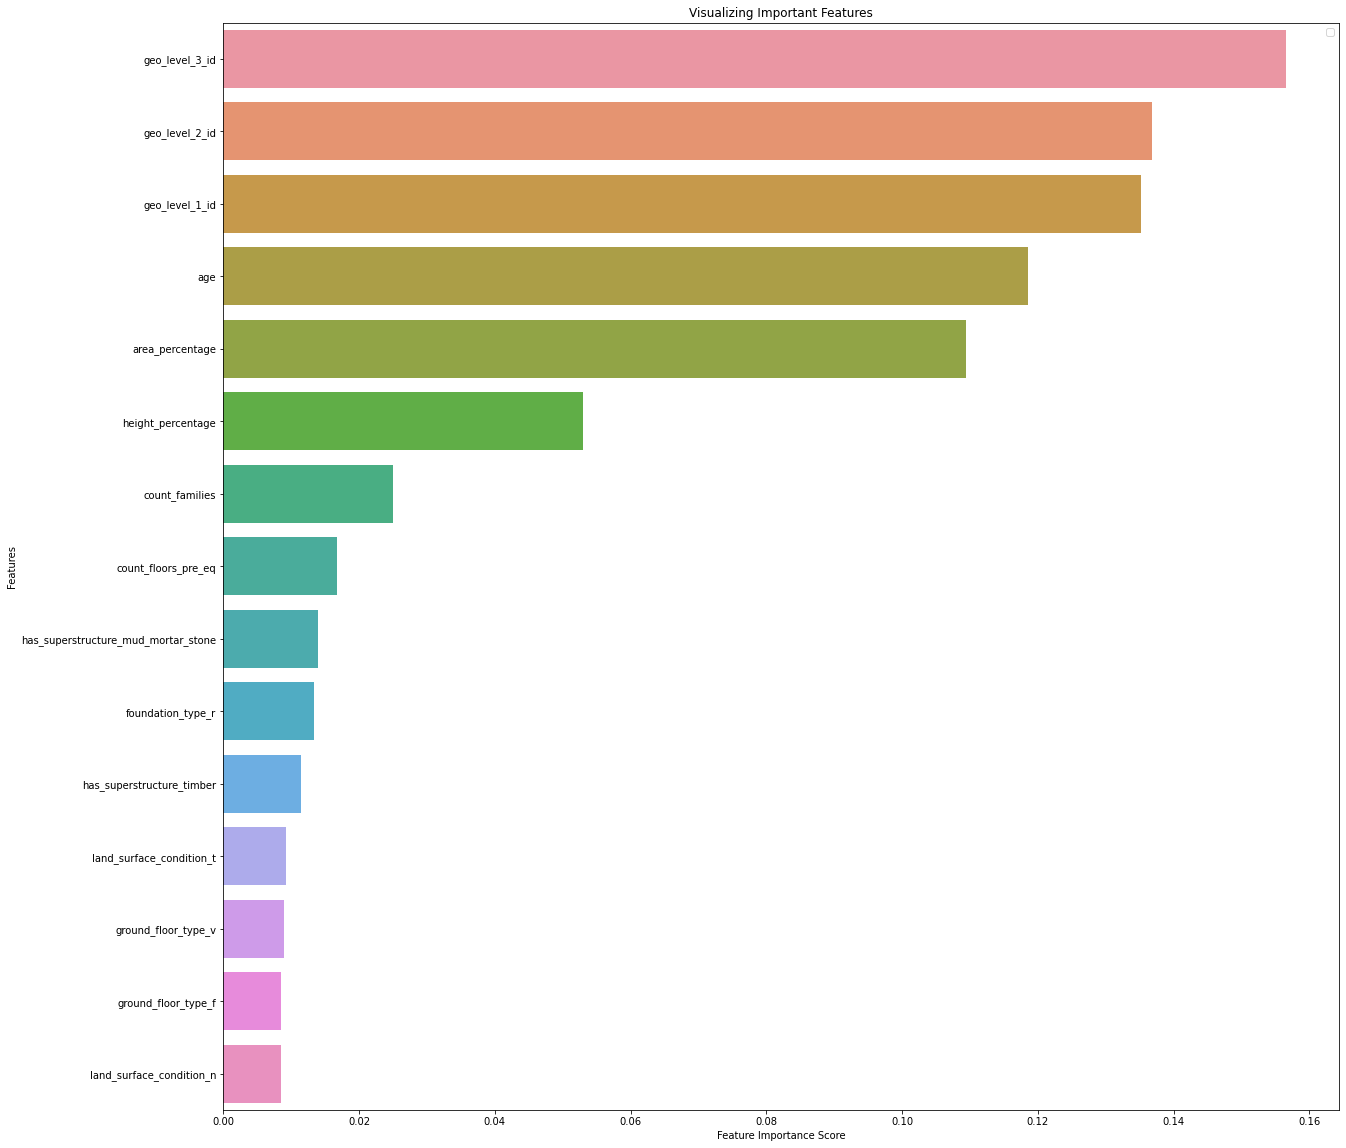

In [58]:
plt.figure(figsize=(20,20))
SEED = 7
# Creating a bar plot
feature_imp_short = feature_imp[:15]
sns.barplot(x=feature_imp_short, y=feature_imp_short.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


**Model Building**

In [59]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_col = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 
              'count_floors_pre_eq', 'age', 'area_percentage', 
              'height_percentage']

X_train[scaled_col] = scaler.fit_transform(X_train[scaled_col])
X_test[scaled_col] = scaler.transform(X_test[scaled_col])




In [60]:
X_train

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
170377,-0.111023,-1.077522,0.574734,1.196103,0.275015,-1.788529,-0.218594,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
184895,-0.982874,0.907934,0.807815,1.196103,1.193674,0.720798,1.590200,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
26740,-0.858323,0.330964,1.224894,-0.177786,1.499894,0.093466,-0.218594,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
198210,-0.858323,-0.355097,-0.957847,-0.177786,0.581235,-0.220199,-0.821526,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
254313,0.387178,-0.047218,-1.430591,1.196103,0.581235,-0.533865,0.987269,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,-0.111023,0.503085,-1.269628,-0.177786,0.275015,-0.533865,-0.218594,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
103694,-0.484673,1.686117,0.528117,-0.177786,-0.949865,-0.847531,-0.821526,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
131932,-0.733773,0.900662,-0.276152,1.196103,-0.031205,2.289127,0.987269,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
146867,-0.484673,-1.516311,-1.210672,1.196103,-0.643645,1.034464,0.987269,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [61]:
def make_confusion_matrix(pred, title):
    cam = confusion_matrix(y_test, pred)
    sns.heatmap(cam, annot=True, cmap='viridis', 
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'],
                fmt="d")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Using {} Algorithm'.format(title))
    plt.show()

**Logistic Regression**

              precision    recall  f1-score   support

           1       0.61      0.31      0.41      5170
           2       0.60      0.87      0.71     29487
           3       0.54      0.20      0.29     17464

    accuracy                           0.59     52121
   macro avg       0.58      0.46      0.47     52121
weighted avg       0.58      0.59      0.54     52121



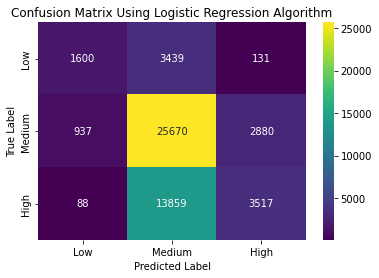

Train F1 Score (Micro) for Logistic Regression Algorithm is : 0.5948196469685342
Test F1 Score (Micro) for Logistic Regression Algorithm is : 0.590683217896817


In [62]:
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)
train_pred_1 = model_1.predict(X_train)

print(classification_report(y_test, pred_1))
make_confusion_matrix(pred_1, 'Logistic Regression')
train_score_1 = f1_score(y_train, train_pred_1, average='micro')
score_1 = f1_score(y_test, pred_1, average='micro')
print('Train F1 Score (Micro) for Logistic Regression Algorithm is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for Logistic Regression Algorithm is : {}'.format(score_1))

**Logistic Regression using CV**

In [63]:
model_cv_1 = LogisticRegression(random_state=0)
kfold = KFold(n_splits=10)
scores_1 = cross_val_score(model_cv_1, X_train, y_train, scoring="f1_micro", cv=kfold)
result_1 = scores_1.mean()
print('Average F1 Score (Micro) for Logistic Algorithm is : {}'.format(result_1))


Average F1 Score (Micro) for Logistic Algorithm is : 0.594599002302379


**Decision Tree**

In [64]:
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_test)
train_pred_2 = model_2.predict(X_train)

print(classification_report(y_test, pred_2))
#make_confusion_matrix(pred_2, 'Decision Tree')
train_score_2 = f1_score(y_train, train_pred_2, average='micro')
score_2 = f1_score(y_test, pred_2, average='micro')
print('Train F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(train_score_2))
print('Test F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(score_2))


              precision    recall  f1-score   support

           1       0.49      0.51      0.50      5170
           2       0.71      0.71      0.71     29487
           3       0.62      0.61      0.62     17464

    accuracy                           0.66     52121
   macro avg       0.61      0.61      0.61     52121
weighted avg       0.66      0.66      0.66     52121

Train F1 Score (Micro) for Decision Tree Algorithm is : 0.9857252494244052
Test F1 Score (Micro) for Decision Tree Algorithm is : 0.6564340668828303


**Decision Tree using CV**

In [65]:

model_cv_2 = DecisionTreeClassifier(random_state=0)
kfold = KFold(n_splits=10)
scores_2 = cross_val_score(model_cv_2, X_train, y_train, scoring="f1_micro", cv=kfold)
result_2 = scores_2.mean()
print('Average F1 Score (Micro) for Decision Tree is : {}'.format(result_2))

Average F1 Score (Micro) for Decision Tree is : 0.6567824251726784


**K-Nearest Neighbors**

In [66]:


model_3 = KNeighborsClassifier()
model_3.fit(X_train, y_train)
pred_3 = model_3.predict(X_test)
train_pred_3 = model_3.predict(X_train)

print(classification_report(y_test, pred_3))
#make_confusion_matrix(pred_3, 'K-Nearest Neighbors')
train_score_3 = f1_score(y_train, train_pred_3, average='micro')
score_3 = f1_score(y_test, pred_3, average='micro')
print('Train F1 Score (Micro) for K-Nearest Neighbors Algorithm is : {}'.format(train_score_3))
print('Test F1 Score (Micro) for K-Nearest Neighbors Algorithm is : {}'.format(score_3))


              precision    recall  f1-score   support

           1       0.54      0.46      0.50      5170
           2       0.68      0.74      0.71     29487
           3       0.61      0.54      0.57     17464

    accuracy                           0.65     52121
   macro avg       0.61      0.58      0.59     52121
weighted avg       0.64      0.65      0.64     52121

Train F1 Score (Micro) for K-Nearest Neighbors Algorithm is : 0.7587346508058327
Test F1 Score (Micro) for K-Nearest Neighbors Algorithm is : 0.6462654208476429


**K-Nearest Neighbors with CV**

In [67]:

model_cv_3 = KNeighborsClassifier()
kfold = KFold(n_splits=10)
scores_3 = cross_val_score(model_cv_3, X_train, y_train, scoring="f1_micro", cv=kfold)
result_3 = scores_3.mean()
print('Average F1 Score (Micro) for K-Nearest Neighbors is : {}'.format(result_3))


Average F1 Score (Micro) for K-Nearest Neighbors is : 0.6425364543361474


**Naive Bayes**

In [68]:


model_5 = GaussianNB()
model_5.fit(X_train, y_train)
pred_5 = model_5.predict(X_test)
train_pred_5 = model_5.predict(X_train)

print(classification_report(y_test, pred_5))
#make_confusion_matrix(pred_5, 'Naive Bayes')
train_score_5 = f1_score(y_train, train_pred_5, average='micro')
score_5 = f1_score(y_test, pred_5, average='micro')
print('Train F1 Score (Micro) for Naive Bayes Algorithm is : {}'.format(train_score_5))
print('Test F1 Score (Micro) for Naive Bayes Algorithm is : {}'.format(score_5))


              precision    recall  f1-score   support

           1       0.37      0.58      0.45      5170
           2       0.68      0.12      0.20     29487
           3       0.40      0.89      0.55     17464

    accuracy                           0.42     52121
   macro avg       0.48      0.53      0.40     52121
weighted avg       0.55      0.42      0.35     52121

Train F1 Score (Micro) for Naive Bayes Algorithm is : 0.4207118188795088
Test F1 Score (Micro) for Naive Bayes Algorithm is : 0.4238406784213657


**Naive Bayes with CV**

In [69]:

model_cv_4 = GaussianNB()
kfold = KFold(n_splits=10)
scores_4 = cross_val_score(model_cv_4, X_train, y_train, scoring="f1_micro", cv=kfold)
result_4 = scores_4.mean()
print('Average F1 Score (Micro) for Naive Bayes is : {}'.format(result_4))


Average F1 Score (Micro) for Naive Bayes is : 0.42016020721412123


**Gradient Boosting**

In [70]:
from xgboost import XGBClassifier
model_6 = XGBClassifier(verbosity=0)
model_6.fit(X_train, y_train)
pred_6 = model_6.predict(X_test)
train_pred_6 = model_6.predict(X_train)

print(classification_report(y_test, pred_6))
#make_confusion_matrix(pred_6, 'Extreme Gradient Boosting')
train_score_6 = f1_score(y_train, train_pred_6, average='micro')
score_6 = f1_score(y_test, pred_6, average='micro')
print('Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : {}'.format(train_score_6))
print('Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : {}'.format(score_6))


              precision    recall  f1-score   support

           1       0.64      0.35      0.45      5170
           2       0.66      0.88      0.75     29487
           3       0.74      0.42      0.53     17464

    accuracy                           0.67     52121
   macro avg       0.68      0.55      0.58     52121
weighted avg       0.68      0.67      0.65     52121

Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.6733163852647736
Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.6727422727883194


**Gradient Boosting withn CV**

In [71]:
from xgboost import XGBClassifier
model_6 = XGBClassifier(verbosity=0)
kfold = KFold(n_splits=10)
scores_6 = cross_val_score(model_6, X_train, y_train, scoring="f1_micro", cv=kfold)
result_6 = scores_6.mean()
print('Average F1 Score (Micro) for Extreme Gradient Boosting is : {}'.format(result_6))


Average F1 Score (Micro) for Extreme Gradient Boosting is : 0.6732540291634689


**Random Forest**


In [72]:
model_7 = RandomForestClassifier(random_state=0)
model_7.fit(X_train, y_train)
pred_7 = model_7.predict(X_test)
train_pred_7 = model_7.predict(X_train)

print(classification_report(y_test, pred_7))
#make_confusion_matrix(pred_7, 'Random Forest')
train_score_7 = f1_score(y_train, train_pred_7, average='micro')
score_7 = f1_score(y_test, pred_7, average='micro')
print('Train F1 Score (Micro) for Random Forest Algorithm is : {}'.format(train_score_7))
print('Test F1 Score (Micro) for Random Forest Algorithm is : {}'.format(score_7))

              precision    recall  f1-score   support

           1       0.66      0.47      0.55      5170
           2       0.72      0.83      0.77     29487
           3       0.72      0.59      0.65     17464

    accuracy                           0.71     52121
   macro avg       0.70      0.63      0.66     52121
weighted avg       0.71      0.71      0.71     52121

Train F1 Score (Micro) for Random Forest Algorithm is : 0.9857252494244052
Test F1 Score (Micro) for Random Forest Algorithm is : 0.7135511598012317


**Random Forest with CV**





In [73]:
model_7 = RandomForestClassifier(random_state=0)
kfold = KFold(n_splits=10)
scores_7 = cross_val_score(model_7, X_train, y_train, scoring="f1_micro", cv=kfold)
result_7 = scores_7.mean()
print('Average F1 Score (Micro) for Random Forest is : {}'.format(result_7))

Average F1 Score (Micro) for Random Forest is : 0.7101880276285495


In [74]:
names = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 
         'Naive Bayes', 'Extreme Gradient Boosting', 'Random Forest']
cv_score_f1 = [result_1, result_2, result_3, result_4,result_6, result_7]
train_score_f1 = [train_score_1, train_score_2, train_score_3, train_score_5, train_score_6, train_score_7]
score_f1 = [score_1, score_2, score_3,  score_5, score_6, score_7]


In [75]:
scores = pd.DataFrame()
scores['Algorithm'] = names
scores['CV F1 Score'] = cv_score_f1
scores['F1 Score (Train)'] = train_score_f1
scores['F1 Score (Test)'] = score_f1
scores


,Algorithm,CV F1 Score,F1 Score (Train),F1 Score (Test)
0,Logistic Regression,0.594599,0.594820,0.590683
1,Decision Tree,0.656782,0.985725,0.656434
2,K-Nearest Neighbors,0.642536,0.758735,0.646265
3,Naive Bayes,0.420160,0.420712,0.423841
4,Extreme Gradient Boosting,0.673254,0.673316,0.672742
5,Random Forest,0.710188,0.985725,0.713551


**Hyperparameter Tuning**

In [76]:

xgb_params = {'n_estimators':range(50, 201, 50),
              'max_depth': range(3, 15)}
xgb_model = XGBClassifier(verbosity=0)
kfold = KFold(n_splits=4)
rscv_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_params, n_iter=5,
                              scoring='f1_micro', cv=kfold, random_state=0, n_jobs=-1)

rscv_xgb.fit(X_train, y_train)
print("Optimal hyperparameter combination for XGBClassifier:", rscv_xgb.best_params_)
print()
print("Mean cross-validated training accuracy score:", rscv_xgb.best_score_)


Optimal hyperparameter combination for XGBClassifier: {'n_estimators': 150, 'max_depth': 10}

Mean cross-validated training accuracy score: 0.73501055257099


 ### finally the xgb algorithm is good with no overfitting 


## MODEL COMPARRISION REPORT

1. Logistic Regression - Logistic regression aims to measure the relationship between a categorical dependent variable and one or more independent variables (usually continuous) by plotting the dependent variables' probability scores.

        Train F1 Score (Micro) for Logistic Regression Algorithm is : 0.5948196469685342
   
        Test F1 Score (Micro) for Logistic Regression Algorithm is : 0.590683217896817
   
        Cross-Validation of Logistic Regression is : 0.594599002302379


2. Decision Tree - The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data). In Decision Trees, for predicting a class label for a record we start from the root of the tree.

        Train F1 Score (Micro) for Decision Tree Algorithm is : 0.9857252494244052
        
        Test F1 Score (Micro) for Decision Tree Algorithm is : 0.6564340668828303
        
        Cross- Validation F1 score for decision Tree Algorithm is : 0.6567824251726784


3. Random Forest - Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

       Train F1 Score (Micro) for Random Forest Algorithm is : 0.9857252494244052
    
       Test F1 Score (Micro) for Random Forest Algorithm is : 0.7135511598012317
    
       Cross-Validation of F1 Score for Random Forest Algorithm is : 0.7101880276285495


4. Gradient Boosting - Gradient boosting Regression calculates the difference between the current prediction and the known correct target value. This difference is called residual. After that Gradient boosting Regression trains a weak model that maps features to that residual.

        Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.6733163852647736
        
        Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.6727422727883194
            
        Cross-validation of F1 Score for Extreme Gradient Boosting Algorithm is : 0.6732540291634689


5. Naive Bayes - The objective here is to determine the likelihood of an event A happening given B happens. The naive Bayes classifier combines Bayes' model with decision rules like the hypothesis which is the most probable outcomes.

        Train F1 Score (Micro) for Naive Bayes Algorithm is : 0.4207118188795088
    
        Test F1 Score (Micro) for Naive Bayes Algorithm is : 0.4238406784213657
            
        Cross-Validation of F1 Score for Naive Bayes Algorithm is : 0.42016020721412123


6 . K-Nearest Neighbors - KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

     Train F1 Score (Micro) for K-Nearest Neighbors Algorithm is : 0.7587346508058327
    
     Test F1 Score (Micro) for K-Nearest Neighbors Algorithm is : 0.6462654208476429
    
     Cross-Validation of F1 Score for K-Nearest Neighbors Algorithm is : 0.6425364543361474 


#### From above compasrission F1 score table of algorithms we can see that XG BOOST have highest accuracy , therfore it is good model which has no overfitting.

## REPORT ON CHALLENGES FACED

FEATURE ENGINERRING:
    
     1.Handling the Outliers: The outliers were detected using Boxplot.
    
    2.Scaling Here StandardScalar() is used for scaling and then the data is transformed uing scaler.transform method is used to transform the data ready for Model Building.

    3.Feature Selection Feature selection is done using corr(),Feature importance is analysied using information gain technique and SelectKBest is used to select important features.The process of selecting features with a categorical type will use SelectKBest. Using this, the chi squared metrics is used where the higher the chi squared, the more significant the effect of the feature.

MODEL BULIDING,EVALUATION AND COMPARISION:
    
    Here first Independent and Dependent features are assigned and then train_test_split is used to split the data. Then each algorithms Objects are created and the train variables are fit and trained.The predict variable is assigned using confusion matrix and then Evaluation is performed by cross validation of F1 score of each algorithm,and hypertooning is pefromed for algorithm which has highest accuracy of F1 Scores.